In [5]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

# Neural Network 
**Reiter Gregor, Havilash Sivaratnam, Nicolas Castillo Thöni, Ensar Korkmaz**

## Activation Function's

<div style="font-size: 150%;float:left;">$$\mathrm{ReLU}(x) = \max(0, x)$$</div>

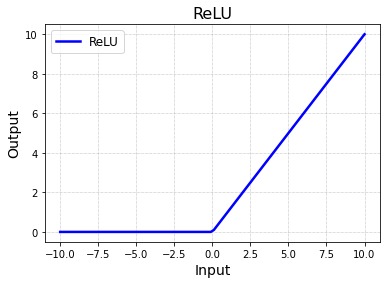

In [6]:
def func(x):
    return np.maximum(x, 0)

x = np.linspace(-10, 10, 100)
y = func(x)

plt.plot(x, y, linewidth=2.5, color='blue', markersize=3, label='ReLU')

plt.title('ReLU', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.show()


<div style="font-size: 150%;float:left;">$$\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}$$</div>


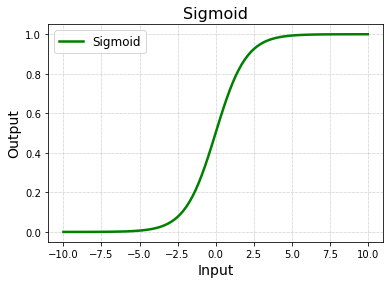

In [11]:
def func(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = func(x)

plt.plot(x, y, linewidth=2.5, color='green', markersize=3, label='Sigmoid')

plt.title('Sigmoid', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.show()

<div style="font-size: 150%;float:left;">$$\mathrm{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}$$</div>

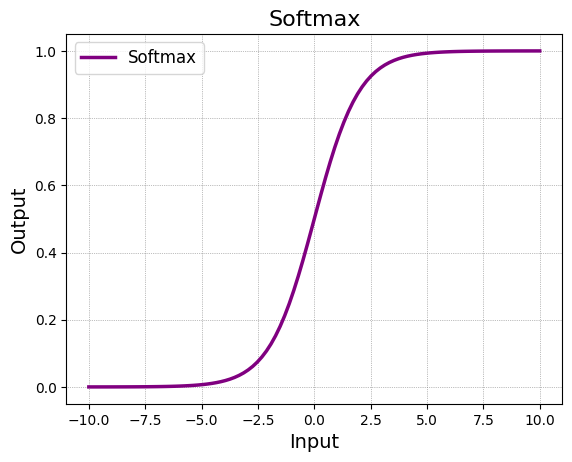

In [5]:
def func(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-10, 10, 100)
y = func(x)

plt.plot(x, y, linewidth=2.5, color='purple', markersize=3, label='Softmax')

plt.title('Softmax', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.show()

<div style="font-size: 150%;float:left;">$$\mathrm{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$</div>

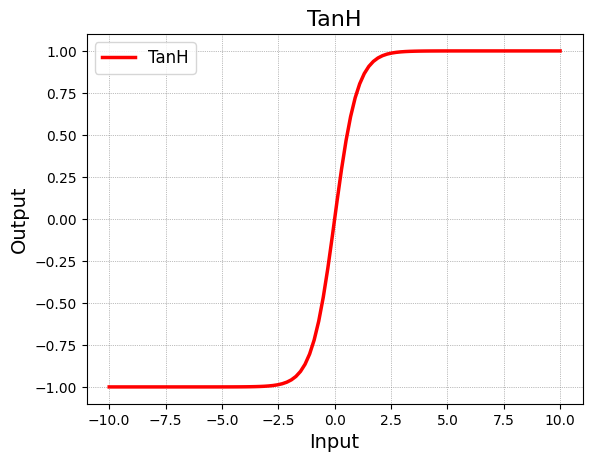

In [15]:
def func(x):
    num = np.exp(2 * x)
    return (num - 1) / (num + 1)


x = np.linspace(-10, 10, 100)
y = func(x)

plt.plot(x, y, linewidth=2.5, color='red', markersize=3, label='TanH')

plt.title('TanH', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.show()

In [ ]:
from neural_network import activations, costs, nn as neural_network, layers
from neural_network.data import get_mnist_data, train_test_split
from neural_network.filters import ALL_FILTERS


def main():
    nn = neural_network.NeuralNetwork([
        layers.Conv2D(ALL_FILTERS),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(13 * 13 * len(ALL_FILTERS), 128, activations.ReLU),
        layers.Dense(128, 10, activations.Softmax),
    ])
    
    one_hot = lambda y: np.eye(10)[y]

    x, y = get_mnist_data()
    # x, y = get_augmented_mnist_data(3)  # needs some time
    # x = x.reshape(-1, 28*28)
    y = np.array([one_hot(i) for i in y])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    train_data = np.array(list(zip(x_train, y_train)), dtype=object)[:2560]
    test_data = np.array(list(zip(x_test, y_test)), dtype=object)

    
    nn.train(train_data, test_data, 0.25, cost=costs.CategoricalCrossEntropy, batch_size=32, epochs=5, save=False, file_name="neural_network.pkl")
    
    '''
    with open('neural_network.pkl', 'rb') as f:
        nn = neural_network.NeuralNetwork.load(f)
    '''

    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    for i in range(3):
        for j in range(3):
            k = np.random.randint(len(test_data))
            axes[i, j].imshow(test_data[k][0].reshape((28, 28)), cmap='gray')
            expected = np.argmax(test_data[k][1])
            predicted = np.argmax(nn.predict(test_data[k][0]))
            axes[i, j].set_title(f"Expected: {expected}\nPredicted: {predicted}")
            axes[i, j].set_xticklabels([])
            axes[i, j].set_yticklabels([])
            axes[i, j].tick_params(axis='both', which='both', length=0)
    fig.subplots_adjust(hspace=0.5)
    plt.show()

if __name__ == "__main__":
    main()



Training ...
Epoch 1/5
- Progress: [██████████████████████████████████████████████████] Cost: 0.4768 | Accuracy: 0.8533
Epoch 2/5
- Progress: [██████████████████████████████████████████████████] Cost: 0.3573 | Accuracy: 0.8906
Epoch 3/5
- Progress: [██████████████████████████████████████████████████] Cost: 0.3203 | Accuracy: 0.9014
Epoch 4/5
- Progress: [██████████████████████████████████████████████████